In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_curve, auc, precision_score, recall_score, roc_auc_score
)

In [3]:
# Load the dataset
df = pd.read_csv("data.csv")  

In [4]:
# Drop unnecessary columns
df = df.drop(['id', 'Unnamed: 32'], axis=1)

In [5]:
# Encode the target variable (M=1, B=0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})


In [6]:
# Features and Target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [10]:
# Predictions
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

In [11]:
# Evaluation Metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

Confusion Matrix:
 [[70  1]
 [ 2 41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Precision: 0.9761904761904762
Recall: 0.9534883720930233
ROC AUC Score: 0.99737962659679


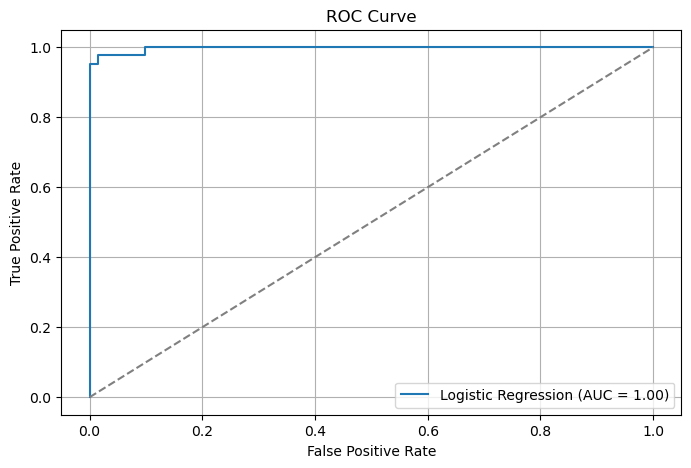

In [12]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(auc(fpr, tpr)))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


In [13]:
# Tune threshold manually
optimal_threshold = 0.4  # Example threshold
y_pred_custom = (y_prob >= optimal_threshold).astype(int)
print(f"\nCustom Threshold: {optimal_threshold}")
print("Precision (custom):", precision_score(y_test, y_pred_custom))
print("Recall (custom):", recall_score(y_test, y_pred_custom))


Custom Threshold: 0.4
Precision (custom): 0.9767441860465116
Recall (custom): 0.9767441860465116


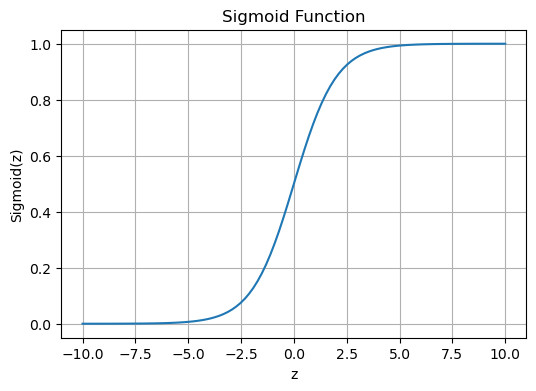

In [14]:
# Explain Sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 100)
sig = sigmoid(z)
plt.figure(figsize=(6,4))
plt.plot(z, sig)
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("Sigmoid(z)")
plt.grid()
plt.show()
